6.542691848131515e-05
[ 1.27082146 -0.980719  ]
[ 1.24538299 -0.90721947]
[ 1.22492319 -0.85251262]
158731371107.84723 [ 4.69982222  5.69975556  6.69968889  7.69962222  8.69956667  9.6995
 10.69943333 11.69936667 12.69928889 13.69922222 14.69915556 15.69907778
 16.69901111 17.69893333 18.69887778 19.69881111 20.69876667 21.69867778
 22.69864444]
143149559596.9583 [ 5.69975556  8.1996     10.69942222 13.19924444 15.69906667 18.1989
 20.6987     23.19852222 25.69833333 28.19816667 30.698     ]
115122607118.04875 [ 5.69975556  8.1996     10.69945556 13.19924444 15.69905556 18.19887778
 20.69867778 23.19848889 25.6983     28.19811111 30.6979     33.19771111
 35.69752222 38.19731111 40.69712222 43.19693333 45.69668889 48.19653333
 50.69633333 53.19615556]
8.913206606436864
1.2911911578441186
1.4007688831833183


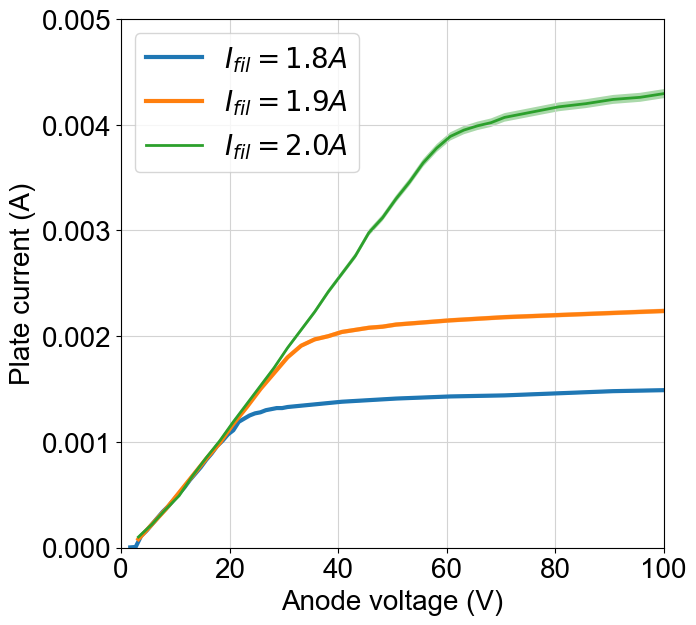

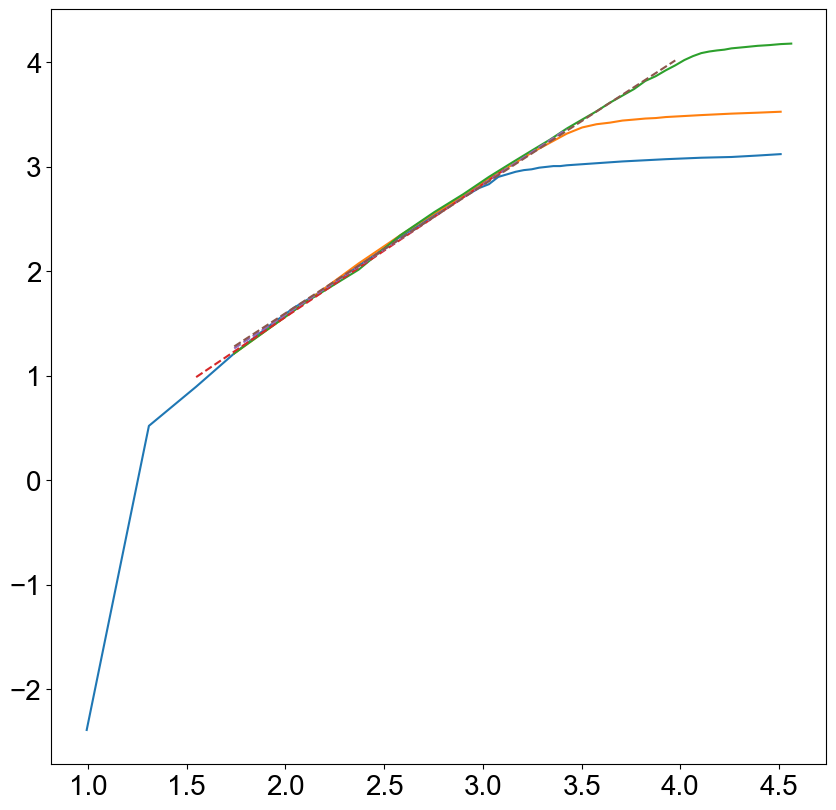

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd
matplotlib.rcParams['figure.dpi'] = 100
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
V1_hv=np.arange(1,30+1,1);V1_hv=np.append(V1_hv,np.arange(40,100+1,10))
V1=np.array([0.02,0.06,1.1,1.6,2.2,2.8,3.4,3.9,4.5,5.1,5.7,6.4,7.0,7.6,8.3,8.9,9.6,10.1,10.7,11.1,11.9,12.2,12.5,12.7,12.8,13.0,13.1,13.2,13.2,13.3,13.8,14.1,14.3,14.4,14.6,14.8,14.9])
I1=V1/10000
V1_hv=V1_hv+0.4+0.3-0.5*I1/0.45
err=0.01
figure(1,figsize=(7,7))
plt.plot(V1_hv,I1,lw=3,label='$I_{fil}=1.8A$')
plt.fill_between(V1_hv, I1-I1*err, I1+I1*err,alpha=0.4,zorder=-1)
plt.xlabel('Anode voltage (V)')
plt.ylabel('Plate current (A)')

V2_hv=np.arange(2.5,50+1,2.5);V2_hv=np.append(V2_hv,np.arange(60,100+1,10))
V2=np.array([0.8,2.2,3.6,5.2,6.8,8.4,9.9,11.7,13.3,15,16.5,18,19.1,19.7,20,20.4,20.6,20.8,20.9,21.1,21.5,21.8,22,22.2,22.4])
I2=V2/10000
V2_hv=V2_hv+0.4+0.3-0.5*I2/0.45
#figure(2,figsize=(4,4))
plt.plot(V2_hv,I2,lw=3,label='$I_{fil}=1.9A$')
plt.fill_between(V2_hv, I2-I2*err, I2+I2*err,alpha=0.4,zorder=-1)

V3_hv=np.arange(2.5,70+1,2.5);V3_hv=np.append(V3_hv,np.arange(75,100+1,5))
V3=np.array([1,2.2,3.6,4.9,6.8,8.5,10.1,11.9,13.6,15.3,17.0,18.9,20.6,22.3,24.2,25.9,27.6,29.8,31.2,33,34.6,36.4,37.8,38.9,39.5,39.9,40.2,40.7,41.2,41.7,42,42.4,42.6,43])
I3=V3/10000
V3_hv=V3_hv+0.4+0.3-0.5*I3/0.45
#figure(3,figsize=(4,4))
plt.plot(V3_hv,I3,lw=2,label='$I_{fil}=2.0A$')
plt.fill_between(V3_hv, I3-I3*err, I3+I3*err,alpha=0.4,zorder=-1)
plt.grid(c='lightgray')
plt.xlim(0,100)
plt.ylim(0,0.005)
plt.legend()


#theoretical stuff
K=(8/9)*np.pi*(8.854187E-12)*(2*1.60217663E-19/9.10938e-31)**(1/2)/(3.25E-3)*(14.5E-3)
print(K)
figure(2,figsize=(10,10))
plt.plot(np.log(V1_hv[1:-1]),np.log(I1[1:-1]/K))
plt.plot(np.log(V2_hv[1:-1]),np.log(I2[1:-1]/K))
plt.plot(np.log(V3_hv[1:-1]),np.log(I3[1:-1]/K))

a1=np.polyfit(np.log(V1_hv[3:-15]), np.log(I1[3:-15]/K),deg=1)
plt.plot(np.log(V1_hv[3:-15]),a1[0]*np.log(V1_hv[3:-15])+a1[1],ls='dashed')
print(a1)
a2=np.polyfit(np.log(V2_hv[1:-13]), np.log(I2[1:-13]/K),deg=1)
plt.plot(np.log(V2_hv[1:-13]),a2[0]*np.log(V2_hv[1:-13])+a2[1],ls='dashed')
print(a2)
a3=np.polyfit(np.log(V3_hv[1:-13]), np.log(I3[1:-13]/K),deg=1)
plt.plot(np.log(V3_hv[1:-13]),a3[0]*np.log(V3_hv[1:-13])+a3[1],ls='dashed')
print(a3)

#e/m
e_m1=(9*I1/(8*np.pi*8.854187E-12*np.sqrt(2)*(V1_hv**(3/2))))**2
e_m2=(9*I2/(8*np.pi*8.854187E-12*np.sqrt(2)*(V2_hv**(3/2))))**2
e_m3=(9*I3/(8*np.pi*8.854187E-12*np.sqrt(2)*(V3_hv**(3/2))))**2
print(np.mean(e_m1[3:-15]),V1_hv[3:-15])
print(np.mean(e_m2[1:-13]),V2_hv[1:-13])
print(np.mean(e_m3[1:-13]),V3_hv[1:-13])

#A_0
T=2200
k=1.3807E-23
W=7.04958E-19
rad=3.25E-3
h=14.5E-3
J=I1[-1]/(2*np.pi*rad*h+np.pi*rad**2)
A0_1= T**2/J*np.exp(-W/(k*T))
print(A0_1*10E4)

T=2270
k=1.3807E-23
W=7.04958E-19
rad=3.25E-3
h=14.5E-3
J=I2[-1]/(2*np.pi*rad*h+np.pi*rad**2)
A0_1= T**2/J*np.exp(-W/(k*T))
print(A0_1*10E3)

T=2340
k=1.3807E-23
W=7.04958E-19
rad=3.25E-3
h=14.5E-3
J=I3[-1]/(2*np.pi*rad*h+np.pi*rad**2)
A0_1= T**2/J*np.exp(-W/(k*T))
print(A0_1*10E3)